In [6]:
import pandas as pd
#read csv /Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_1.csv
df_attack=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_1.csv')
df_attack_2=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_2.csv')

In [10]:
#add the two dataframes together
df_attack = pd.concat([df_attack, df_attack_2])


In [11]:
len(df_attack)

544

In [12]:
#check values in attack column
df_attack['attack'].value_counts()

attack
yes    334
no     210
Name: count, dtype: int64

In [13]:
#only keep the columns where 'attack' is 'yes'
df_attack_yes=df_attack[df_attack['attack']=='yes']


In [14]:
df_attack_yes['User Name'].value_counts()

User Name
houyuih         163
DoctorKoWJ      104
chingte          34
TerryGou1018     33
Name: count, dtype: int64

/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_15287/512908471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack_yes['Post Created'] = pd.to_datetime(df_attack_yes['Post Created'])
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_15287/512908471.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_attack_yes['Week'] = df_attack_yes['Post Created'].dt.to_period('W')
/var/folders/kf/vzjyh1g17x3gw7hgly31fnc80000gn/T/ipykernel_15287/512908471.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

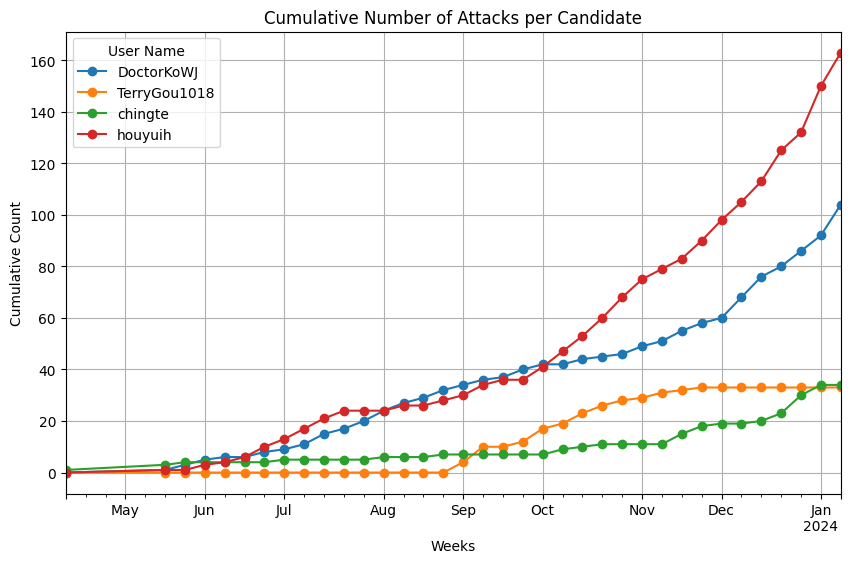

In [17]:
#plot df_attack_yes 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Post Created' is the column containing the timestamp
df_attack_yes['Post Created'] = pd.to_datetime(df_attack_yes['Post Created'])

# Create a new column for the week
df_attack_yes['Week'] = df_attack_yes['Post Created'].dt.to_period('W')

# Group by 'Week' and 'User Name', then count occurrences
grouped_data = df_attack_yes.groupby(['Week', 'User Name']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'User Name' as columns
pivot_data = grouped_data.pivot(index='Week', columns='User Name', values='Count').fillna(0)

# Create a cumulative sum for each column
cumulative_data = pivot_data.cumsum()

# Plotting
cumulative_data.plot.line(figsize=(10, 6), marker='o')

# Customize the plot
plt.title('Cumulative Number of Attacks per Candidate')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Count')
plt.legend(title='User Name')
plt.grid(True)
plt.show()


# calculate average number of interactions for the attack posts

## merge the df with the original csv 

In [50]:
#attack_df 
df_attack=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_1.csv')
df_attack_2=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/save_for_label_df_DONE_2.csv')

#original df read /Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/filtered_df.csv
filtered_df=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/filtered_df.csv')
#read /Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/filtered_df_2.csv
filtered_df_2=pd.read_csv('/Users/jasperhewitt/Desktop/github_repos/Campaigning_101/data/filtered_df_2.csv')

In [51]:
#merge the two dataframes together on the columns serial_number, User Name, URL, Post Created
df_attack_merge=pd.merge(filtered_df, df_attack, on=['serial_number', 'User Name', 'URL', 'Post Created', 'combined_text'], how='left')

print(len(df_attack_merge))
#check value in attack column, also show how many nan 
df_attack_merge['attack'].value_counts(dropna=False)

1372


attack
NaN    967
yes    233
no     172
Name: count, dtype: int64

In [52]:
#merge df_attack_2 with filtered_df_2 on the same columns 
df_attack_merge_2=pd.merge(filtered_df_2, df_attack_2, on=['serial_number', 'User Name', 'URL', 'Post Created', 'combined_text'], how='left')

print(len(df_attack_merge_2))
#check value in attack column, also show how many nan
df_attack_merge_2['attack'].value_counts(dropna=False)

385


attack
NaN    250
yes     98
no      37
Name: count, dtype: int64

In [53]:
#overwrite the serial_number column in df_attack_merge_2 so that it starts counting from where df_attack_merge left off
df_attack_merge_2['serial_number']=df_attack_merge['serial_number'].max()+df_attack_merge_2['serial_number']

#concatenate the two dataframes together
main_df = pd.concat([df_attack_merge, df_attack_merge_2])
# print len of main_df
print(len(main_df))

#show attack values including nan of main_df
main_df['attack'].value_counts(dropna=False)

1757


attack
NaN    1217
yes     331
no      209
Name: count, dtype: int64

In [55]:
# Remove commas from 'Total Interactions' column
main_df['Total Interactions'] = main_df['Total Interactions'].str.replace(',', '')

# Convert 'Total Interactions' column to integer
main_df['Total Interactions'] = main_df['Total Interactions'].astype(int)

In [56]:


# Calculate the average Total Interactions of the rows where attack is yes
print(main_df[main_df['attack']=='yes']['Total Interactions'].mean())

# Also calculate the average Total Interactions of the rows where attack is no or NaN
print(main_df[main_df['attack']!='yes']['Total Interactions'].mean())


25864.770392749244
15173.801542776999


In [57]:
# Calculate the average Total Interactions grouped by User Name where attack is yes
print(main_df[main_df['attack']=='yes'].groupby('User Name')['Total Interactions'].mean())

# Calculate the average Total Interactions grouped by User Name where attack is no or NaN
print(main_df[main_df['attack']!='yes'].groupby('User Name')['Total Interactions'].mean())

User Name
DoctorKoWJ      32350.951456
TerryGou1018    14834.437500
chingte         23008.666667
houyuih         24509.834356
Name: Total Interactions, dtype: float64
User Name
DoctorKoWJ      19283.154110
TerryGou1018    10776.031008
chingte         14561.170487
houyuih         14506.042345
Name: Total Interactions, dtype: float64


In [59]:
#check by type 
# Calculate the average Total Interactions grouped by User Name where attack is yes
print(main_df.groupby('Type')['Total Interactions'].mean())

Type
Link                     3835.000000
Live Video Complete      9850.311404
Live Video Scheduled     6339.000000
Native Video            24145.310680
Photo                   17305.813248
Status                  20200.145161
YouTube                  3576.000000
Name: Total Interactions, dtype: float64


In [64]:
#check values for Type
main_df['Type'].value_counts()

Type
Photo                   1253
Live Video Complete      228
Native Video             206
Status                    62
Live Video Scheduled       5
YouTube                    2
Link                       1
Name: count, dtype: int64

In [61]:
#calculate the number of rows where Type == 'Live Video Complete'
print(len(main_df[main_df['Type']=='Live Video Complete']))

228


In [62]:
#create a new df where Type is not 'Live Video Complete' or 'Live Video Scheduled'
main_df_no_live=main_df[(main_df['Type']!='Live Video Complete') & (main_df['Type']!='Live Video Scheduled')]
print(len(main_df_no_live))

1524


In [63]:
# Calculate the average Total Interactions grouped by User Name where attack is yes
print(main_df_no_live[main_df_no_live['attack']=='yes'].groupby('User Name')['Total Interactions'].mean())

# Calculate the average Total Interactions grouped by User Name where attack is no or NaN
print(main_df_no_live[main_df_no_live['attack']!='yes'].groupby('User Name')['Total Interactions'].mean())

User Name
DoctorKoWJ      33032.161616
TerryGou1018    14834.437500
chingte         23567.062500
houyuih         24923.691824
Name: Total Interactions, dtype: float64
User Name
DoctorKoWJ      20934.330472
TerryGou1018    10642.582677
chingte         15728.482173
houyuih         15676.806324
Name: Total Interactions, dtype: float64


In [65]:
# Calculate the average Total Interactions of the rows where attack is yes
print(main_df_no_live[main_df_no_live['attack']=='yes']['Total Interactions'].mean())

# Also calculate the average Total Interactions of the rows where attack is no or NaN
print(main_df_no_live[main_df_no_live['attack']!='yes']['Total Interactions'].mean())


26279.18944099379
16189.363560732114
